In [ ]:
"""
#Program developed by Raul Ramirez Summer 2019
#Monterrey NL rramirez@tec.mx
#based in multiple sources
"""

In [63]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [64]:
#Read data
candidates = pd.read_csv('candidates.csv')
candidates.head(10)

,gmat,gpa,work_experience,admitted
0,708,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [65]:
#Separate dependent and independent variables
X = candidates[['gmat', 'gpa','work_experience']]
y = candidates['admitted']

In [66]:
#Separate train and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.20,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
#Fit classifier with train data
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
#Predict test data
y_pred=NB.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
22    0
20    0
25    1
4     1
10    0
15    0
28    1
11    1
18    0
29    1
27    0
35    0
37    0
2     1
39    1
30    0
34    1
16    0
36    0
8     1
13    1
5     1
17    1
14    1
33    1
7     1
32    1
1     1
26    1
12    1
31    0
24    0
Name: admitted, dtype: int64


In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
#Get right and wrong classifications
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[13  0]
 [18  1]]


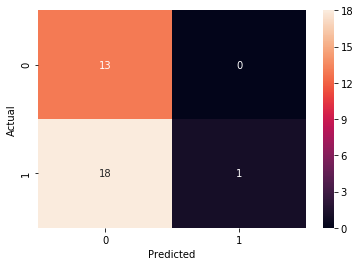

In [71]:
#Pretty print confusion matrix
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)

In [72]:
tn, fp, fn, tp

(13, 0, 18, 1)

In [73]:
#Get performance measures
from sklearn.metrics import classification_report

In [74]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        13
           1       1.00      0.05      0.10        19

    accuracy                           0.44        32
   macro avg       0.71      0.53      0.35        32
weighted avg       0.76      0.44      0.30        32



In [75]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))

Likelihood Ratio 0.05555555555555555


In [76]:
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Accuracy= 0.4375
